# P2 : Project Proposal and Initial Analyses

> - 😀 Name: **Léa Blinière**
> - 🪪 SCIPER: **283670**



<div style="padding:15px 20px 20px 20px;border-left:3px solid green;background-color:#e4fae4;border-radius: 20px;">

## **Assignment Description**
When you have completed Homework H1, your next task will be to continue working on the next project milestone, Milestone P2. In Milestone P2, you will collaborate with your team members to select and refine your project proposal. Your initial task is to choose a project. Although we provide the datasets for your use, it is your responsibility at this stage to conduct preliminary analyses and ensure that your proposed project is feasible given the available data. This initial assessment is critical for the project's success.

The primary objective of Milestone P2 is to become intimately familiar with the data, perform necessary preprocessing, and complete all essential descriptive statistics tasks. We expect you to establish a data pipeline, thoroughly documented in a notebook, and demonstrate that you have well-defined project objectives.

When describing the relevant aspects of the data and any additional datasets you plan to use, you should specifically demonstrate (though not exhaustively):

1. Your ability to manage and process the data, regardless of its size.
2. Your understanding of the data, including formats, distributions, handling missing values, identifying correlations, and more.
3. Your consideration of methods to enrich, filter, or transform the data to suit your project's requirements.
4. Your well-thought-out plan and ideas for the methods you intend to employ, including essential mathematical details in the notebook.
5. A reasonable and sound plan for analysis and communication, which may involve discussing alternative approaches you considered and why you chose the ones presented.

We will evaluate Milestone P2 based on the thoroughness and clarity of these steps, the quality of your code and its documentation, the feasibility and critical awareness of your project, and the clarity and reasonableness of your project idea. Use Milestone P2 to ensure that your project (including the idea and its feasibility) is well-structured and reviewed before advancing too far into the final Milestone P3. There will be dedicated project office hours to assist you.

### Deliverables

- ✅ Readme.md file containing the detailed project proposal (up to 1000 words). Your README.md should contain:
    Title
    Abstract: A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?
    Research Questions: A list of research questions you would like to address during the project.
    Proposed additional datasets (if any): List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible.
    Methods
    Proposed timeline
    Organization within the team: A list of internal milestones up until project Milestone P3.
    Questions for TAs (optional): Add here any questions you have for us related to the proposed project.
- ✅  Notebook containing initial analyses and data handling pipelines. We will grade the **correctness**, **quality of code**, and **quality of textual descriptions**. There should be a single Jupyter notebook containing the main logic. The implementation of helper functions that is not essential for understanding the main logic should be contained in **external scripts/modules*** that will be called from the main notebook.

</div>

# Table of Contents
- **[PART 1: Data Exploration and Preparation](#1)**
    - [1.1 Load the Data and Visual Inspection](#11)
    - [1.2 Data Cleaning](#12)
    - [1.3 Data Merging](#13)
- **[PART 2: Addressing Our Research Questions](#2)**
    - [2.1 Research Question 1](#21)
    - [2.2 Research Question 2: Analysis on Pursuing Oscar's](#21)
    - [2.3 Research Question 3](#21)


### **Import Librairies**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from sklearn.linear_model import LogisticRegression
import pandas as pd

from preprocessing import *
from plot_functions import *
from utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Load Path**

### GOOGLE DRIVE 

In [58]:
# Data Path
DATA_RESULTS = 'Data_results/'

MOVIE_PATH = get_path(
    "https://drive.google.com/file/d/1gIeripRBttNRhJGQKmr-8zeZVLIPXo8s/view?usp=sharing"
)

# Additional data
OSCAR_PATH = get_path(
    "https://drive.google.com/file/d/1IWOH_y_Ikai-6MxcX5WnFm2jqOKCQVQf/view?usp=sharing"
)

IMBD_TITLE_PATH = get_path(
    "https://drive.google.com/file/d/1t6_kQ7tfLsORItYH8f17_EwRQgEm-t69/view?usp=sharing"
)

IMDB_RATING_PATH = get_path(
    "https://drive.google.com/file/d/10EHNScttfKueXibTpASCq2IejROCtEkT/view?usp=sharing"
)

# Load Data already preprocessed
IMBD_MERGE_PATH = get_path(
    "https://drive.google.com/file/d/1NgId8mT7LZZVDVNH0qCz7xd9ft2wyZUI/view?usp=sharing"
)

DATA_CLEAN_PATH = get_path(
    "https://drive.google.com/file/d/1hBC1rdYr0nYfeycCAp6E_fisvYqZkO88/view?usp=sharing"
)

### LOCAL DATA 

In [59]:
# Data Path
DATA_FOLDER = 'Data/'
DATA_SAVE_FOLDER = 'Data_Processed/'

CHARACTER_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"

# Additional data
OSCAR_DATASET = DATA_FOLDER+"the_oscar_award.csv"
IMDB_DATASET = DATA_FOLDER+"title.tsv"
IMDB_RATING_DATASET = DATA_FOLDER+"rating.tsv"
MOVIE_LENS_DATASET = DATA_SAVE_FOLDER+"combined_movies_data.csv"

<a name="1"></a>
## **PART 1: Data Exploration and Preparation**
---

In this section, we will proceed with data preparation for our project. To accomplish this, we will utilize three datasets:

1. **Movie Metadata Dataset:** This dataset contains information about 81,741 films. It was extracted from the Freebase database dated November 4, 2012. It spans a period from the year 1915 to 2012, encompassing a wide range of historical films. Among the available information, we will specifically focus on elements such as the country of origin, box office revenue, and release date of each film.

2. **Character Metadata Dataset:** This dataset is aligned with the movie metadata dataset and includes character names for each movie as well as information regarding the actors playing them, such as age, gender, name, etc. 

3. **IMDb Dataset:** IMDb is a popular online database dedicated to movies, TV shows, and celebrities. IMDb provides various datasets for research purposes, including information about movies, TV series, and their associated data. We will use this dataset to extract user ratings for films.

4. **Award Dataset:** Derived from the "Academy Awards Dataset," this dataset contains information about films selected for the Oscars from the very first Oscars ceremony to the present day.

5. **MovieLens Dataset:** Detailed presentation of the MovieLens movie data by **Salim**.

Once we have loaded these various datasets, we will proceed with a data preprocessing phase to make them suitable for our analysis.

### **1.1 Load the Data and Visual Inspection**

### Movie Metadata 

In [80]:
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres"
]
df_movie = pd.read_csv(MOVIE_PATH, sep='\t', header=None, names=column_names)
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


### Character Metadata 

In [126]:
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID",
]
df_character = pd.read_csv(CHARACTER_DATASET, sep='\t', header=None, names=column_names)
df_character.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7


### IMBd Dataset

In [127]:
column_names = [
    "titleId",
    "ordering",
    "title",
    "region",
    "language",
    "types",
    "attributes",
    "isOriginalTitle"
]
df_imbd = pd.read_csv(IMDB_DATASET, sep='\t', header=None, names=column_names)
df_imbd.drop(0, inplace=True)
df_imbd.head(1)

C:\Users\Pierre-Hadrien\AppData\Local\Temp\ipykernel_13652\2600926818.py:11: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imbd = pd.read_csv(IMDB_DATASET, sep='\t', header=None, names=column_names)


NameError: name 'df_imdb' is not defined

In [81]:
column_names = [
    "titleId",
    "averageRating",
    "numVotes"
]
df_rating = pd.read_csv(IMDB_RATING_DATASET, sep='\t', header=None, names=column_names)
df_rating.drop(0, axis = 0, inplace = True)
df_rating.head(1)

C:\Users\Pierre-Hadrien\AppData\Local\Temp\ipykernel_13652\3953668284.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rating = pd.read_csv(IMDB_RATING_DATASET, sep='\t', header=None, names=column_names)


,titleId,averageRating,numVotes
1,tt0000001,5.7,2007


In [82]:
# Merge the two DataFrames based on the 'titleId' column, using an inner join.
df_imbd_ = pd.merge(df_rating, df_imbd, left_on='titleId', right_on='titleId', how='inner')

# Drop unnecessary columns from the result DataFrame.
df_imbd_.drop(['titleId', 'ordering', 'region', 'language', 'types', 'attributes', 'isOriginalTitle'], axis=1, inplace=True)

# Remove duplicate rows in the DataFrame.
df_imbd_.drop_duplicates(inplace=True)

# Define the path where the merged DataFrame will be saved as a CSV file.
save_path = DATA_SAVE_FOLDER + "df_rating.csv"

# Save the cleaned and merged DataFrame to a CSV file, without including the index and handling encoding errors.
df_imbd_.to_csv(save_path, index=False, encoding='utf-8', errors='ignore')

In [136]:
df_imbd_.head(1)

,averageRating,numVotes,title
0,5.7,2007,Карменсіта


### Award Dataset 

In [84]:
column_names = [
    "Movie Year",
    "Ceremony Year",
    "Ceremony", 
    "Category",
    "Name",
    "Movie name",
    "Winner"
]
df_award = pd.read_csv(OSCAR_PATH, header=None, names=column_names).drop(0)
df_award.head(1)

,Movie Year,Ceremony Year,Ceremony,Category,Name,Movie name,Winner
1,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False


### Movie Lens Dataset

In [85]:
column_names = [
    "ID",
    "Movie release date",
    "Movie name",
    "Average Vote ",
    "Vote Count",
    "Rating"
]
df_lens = pd.read_csv(MOVIE_LENS_DATASET, header=None, names=column_names).drop(0)
df_lens.head(1)

,ID,Movie release date,Movie name,Average Vote,Vote Count,Rating
1,55245,2010-01-01,!Women Art Revolution,4.3,2.0,NaN


### **1.2 Data Cleaning**

### Movie Metadata 

In this initial step, we will undertake the following tasks:

1. **Format Conversion** 
   The columns "Movie languages," "Movie countries," and "Movie genres" currently store Freebase IDs, which makes it challenging to understand and interpret the data. Our first task is to convert these dictionaries containing Freebase IDs into simple strings that contain the actual language, country, or genre names.

2. **Reprocessing film languages**
   In this step, the languages associated with the films are reprocessed. Some films may have been considered "silent films," meaning they were silent and had a specified language. To simplify the analysis, these films are now identified as "silent film" in the language category. Additionally, mentions of the language "english language" are modified to simply "english" for easier processing and subsequent data analysis.

3. **Creating multiple rows for films with multiple genres, languages, or countries**
   This step aims to make data analysis more manageable by handling films with multiple genres, languages, or countries separately. Instead of having a single entry for a film with multiple characteristics, multiple distinct rows are created, each corresponding to a unique characteristic. For example, if a film has two different genres, two separate rows will be created for that film, each indicating a different genre. This allows for a more detailed and precise analysis of the data. It is also mentioned that in the future, the team may focus only on films with a single genre, a single language, and a single country to avoid potential bias caused by the multiplicity of these characteristics.

4. **Splitting the date into 3 columns: year, month, day, and adding a "month available" column**
   In this step, the dates associated with the films are broken down into three distinct parts: the year (year), the month (month), and the day (day). Additionally, a new column called "month available" is created. This column can potentially be useful if the research team seeks to complete missing data regarding the release month of the films.


In [86]:
#df_process = process_movie_data(df_movie, save_to_path=save_path)

In [87]:
df_movie = pd.read_csv("Data_Processed/df_process.csv")

In [88]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True


Since our analysis relies on the relationship that can exist between the release period of a film and other parameters, it is important to have an overview of the number of exploitable data points in our dataset.

In this dataset, there are 36429 movies with missing release month out of a total of 75478 movies.


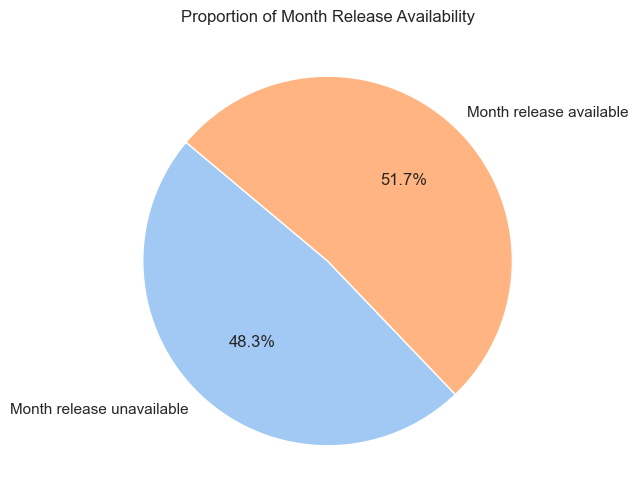

In [89]:
plot_month_release_availability(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

### Movie Lens Dataset

In [90]:
# Drop unnecessary columns.
df_lens.drop(['ID', 'Rating'], axis=1, inplace=True)
df_lens.head(1)

,Movie release date,Movie name,Average Vote,Vote Count
1,2010-01-01,!Women Art Revolution,4.3,2.0


### **1.3 Data Merging**

As previously seen, only 51.7% of our dataset is usable for our analysis. Using the Movie Lens dataset, which also provides the release date of each film, we will merge these two datasets in an attempt to increase the proportion of data for which the months are available.

Given that it's possible for certain films to share the same name but not be released in the same year, we will ensure to verify that the release year matches before extracting the corresponding month.

In [91]:
# Merge the two DataFrames based on the 'Movie name' column, using an inner join.
df_movie = pd.merge(df_movie, df_lens, left_on='Movie name', right_on='Movie name', how='left')

In [92]:
# Complete missing values in the 'Release Month' and 'Release Day' column.
df_movie = update_release_month_and_day(df_movie)

In [93]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Movie release date,Average Vote,Vote Count
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True,2001-08-24,4.8,299.0


In this dataset, there are 30520 movies with missing release month out of a total of 75478 movies.


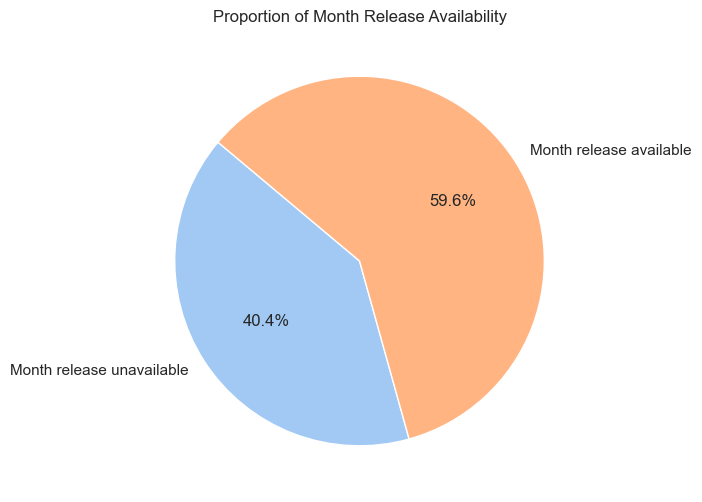

In [94]:
plot_month_release_availability(df_movie.drop_duplicates(subset=['Movie name'], inplace=False))

This step has led to an increase of approximately 10% in the proportion of data usable for our analysis. For the final analysis, we could consider further expanding our dataset, possibly by utilizing the 'Wikipedia movie ID' provided in the metadata dataset.

In [95]:
# Select only the exploitable data.
df_movie = df_movie[df_movie['Month Available']]

# Drop unnecessary columns.
df_movie.drop(['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date'], axis=1, inplace=True)

In [96]:
df_movie.head(1)

,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Average Vote,Vote Count
0,Ghosts of Mars,14010832.0,98.0,English,United States of America,Thriller,2001,8,24,True,4.8,299.0


In [97]:
df_movie.to_csv('data_process_merge.csv', index=False)

### Award Dataset 

During the preprocessing of the Award dataset, we had to exclude data that was not related to films (some awards are "honorary awards" given to individuals). Subsequently, we removed unnecessary columns such as the ceremony type or the awarded person.

In [98]:
# Remove rows with missing 'Movie name' values, as these do not pertain to films.
df_award = df_award.dropna(subset=['Movie name'], axis=0)

# Drop unnecessary columns 'Ceremony Year', 'Ceremony', and 'Name'.
df_award = df_award.drop(['Ceremony Year', 'Ceremony', 'Name'], axis=1)

# Convert the 'Movie Year' column to integer data type for consistency.
df_award['Movie Year'] = df_award['Movie Year'].astype(int)

df_award.head(1)

,Movie Year,Category,Movie name,Winner
1,1927,ACTOR,The Noose,False


Then, we need to merge the Award dataset with the Movie dataset to focus on awarded movies in the main dataset.

In [99]:
# Merge datasets
df_merge_award = pd.merge(df_movie, df_award, left_on='Movie name', right_on='Movie name', how='inner')
display(df_merge_award)

# Handling release year
release_year_list = df_merge_award['Release Year'].to_list()
release_year_list =  [int(x) if not pd.isna(x) else 0 for x in release_year_list]
df_merge_award['Release Year'] = release_year_list

# Filtering movies with correct release year
df_merge_award = df_merge_award[df_merge_award['Release Year'] == df_merge_award['Movie Year']]
df_merge_award.head(1)

,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Average Vote,Vote Count,Movie Year,Category,Winner
0,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,ART DIRECTION,False
1,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,FILM EDITING,False
2,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,MUSIC (Scoring),True
3,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,MUSIC (Song),False
4,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,OUTSTANDING PRODUCTION,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226651,Mondo Cane,NaN,108.0,Italian,Italy,Culture & Society,1962,3,30,True,6.6,18.0,1963,MUSIC (Song),False
226652,Mondo Cane,NaN,108.0,Italian,Italy,Horror,1962,3,30,True,6.6,18.0,1963,MUSIC (Song),False
226653,Mondo Cane,NaN,108.0,Italian,Italy,Mondo film,1962,3,30,True,6.6,18.0,1963,MUSIC (Song),False
226654,Mondo Cane,NaN,108.0,Italian,Italy,World cinema,1962,3,30,True,6.6,18.0,1963,MUSIC (Song),False


,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Average Vote,Vote Count,Movie Year,Category,Winner
0,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,ART DIRECTION,False


We can have a brief look at the dataset and clean it by filtering out valid movies records checking the availblility of its release month and no duplicate with a same movie name. It is important to check how many data records are accessible for further exploration.

In [100]:
# Count the total films 
print("We have {} data for the films that have been selected for the Oscars".format(df_merge_award['Movie name'].nunique()))

# Count the films with available release month and unique value for column 'Movie name'
df_month_avail = df_merge_award[df_merge_award['Month Available'] == True]
num_films_month_avail = df_month_avail['Movie name'].nunique()
print("Number of films with available release month and unique value for column 'Movie name':", num_films_month_avail)
df_month_avail.head()

We have 2668 data for the films that have been selected for the Oscars
Number of films with available release month and unique value for column 'Movie name': 2668


,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Average Vote,Vote Count,Movie Year,Category,Winner
0,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,ART DIRECTION,False
1,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,FILM EDITING,False
2,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,MUSIC (Scoring),True
3,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,MUSIC (Song),False
4,Alexander's Ragtime Band,3600000.0,106.0,English,United States of America,Musical,1938,8,16,True,4.8,6.0,1938,OUTSTANDING PRODUCTION,False


## PART 2: Addressing Our Scientific Question
---

The research questions we would like to address can be divided into four distinct parts.

**Question 1**: Are there any recurring patterns between a film's genre and its release timing within a year? If such patterns exist, do they vary based on the location of the movie, and can these insights contribute to predicting the genre of upcoming film releases in subsequent seasons?

**Question 2**: Which factors have an impact a movie's success, particularly its likelihood of winning Oscar award? How is the effect of release timing evolve over time? Is it possible to predict the Oscar probability, given some factors such as release month, country, language, etc.?

**Question 3**: In what ways is a movie's popularity affected by its release period, considering factors such as box office revenue and ratings?

**Question 4**: To what extent do the involvement of specific actors influence a film's success, including its chances of winning awards, expected box office revenue, and ratings? Additionally, can we generate actor groups based on genres and predict their probability of achieving success?

In this section, we will construct three datasets to answer these four questions, and we will perform a more extensive analysis for milestone 3.

### **1. Research Question 1**

#### **1.1 Data preparation**

For this analysis, we will focus on the film genres, the release period of the year, and the locations where they are released. Therefore, we will begin by selecting the columns of interest for our analysis.

In [101]:
df_release_info = df_movie.drop(['Movie box office revenue', 'Movie runtime', 'Movie languages', 'Vote Count', 'Average Vote '], axis=1, inplace=False)
df_release_info.drop_duplicates(inplace=True)
df_release_info.head(1)

,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True


#### **1.2 Histogram of Release Years**

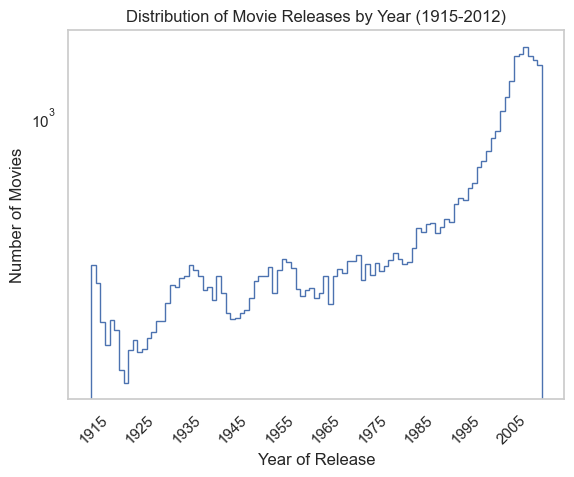

In [102]:
plot_movie_release_distribution(df_release_info.drop_duplicates(subset=['Movie name'], inplace=False))

We observe, unsurprisingly, that the number of films increases considerably with the years. However, the proportion of older films is not negligible. In the context of our study, where we will investigate patterns that may exist between the time of year and the number of film releases, we must take this factor into account and study its evolution over time.

To prepare for this future analysis, let's add a column to our dataset that contains the decades corresponding to the release of each film

In [103]:
# Create a list of film release years from the dataset.
list_release_year = df_release_info['Release Year'].to_list()

# Calculate the corresponding decade for each film release year.
list_decade = [(year//10)*10 for year in list_release_year]

# Add a new column 'Release Decade' to the dataset containing the calculated decades.
df_release_info['Release Decade'] = list_decade

df_release_info.head(1)

,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Release Decade
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True,2000


#### **1.3 Bar Chart of Release Months**

Our study will focus on exploring the potential correlation between the time of the year and film genres. However, it is also of interest to investigate whether there are trends that are independent of the film genre.

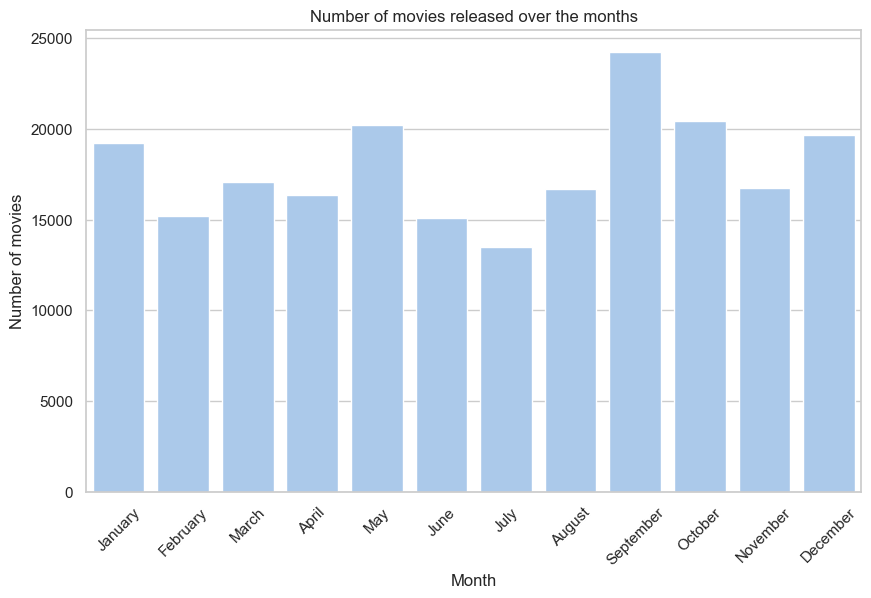

In [104]:
plot_monthly_movie_counts(df_release_info)

This bar chart allows us to conclude that the distribution of films throughout the year is not uniform; for instance, the summer months appear to have fewer releases than others. Therefore, it is necessary to differentiate, for each genre, whether the trend is driven by the overall distribution of films throughout the year or if it is specific to certain film genres.

#### **1.4 Repartition of the Main Genre**

In [105]:
print("In our dataset, we have {} film genres represented".format(df_release_info['Movie genres'].nunique()))

In our dataset, we have 356 film genres represented


In our dataset, we have a wide variety of genres represented. In the future, we may consider grouping certain genres by themes, for example, 'thriller and crime films'. This would allow us to enrich our data more intelligently. For now, we will focus on the five most represented genres in the dataset.

In [106]:
sorted_genre_counts = count_and_sort_movie_genres(df_release_info)

In [107]:
# Select the top 5 genres
selected_genres = list(sorted_genre_counts.keys())[:5]
print("Number of genres selected: ", len(selected_genres))
print("Selected genres: ", selected_genres)

Number of genres selected:  5
Selected genres:  ['Drama', 'Comedy', 'Romance Film', 'Thriller', 'Action']


In [108]:
# Filter the dataset to only include the selected genres
df_release_info = filter_movies_by_genres(df_release_info, selected_genres)

Let's observe the representation of film genres in our resulting dataset.

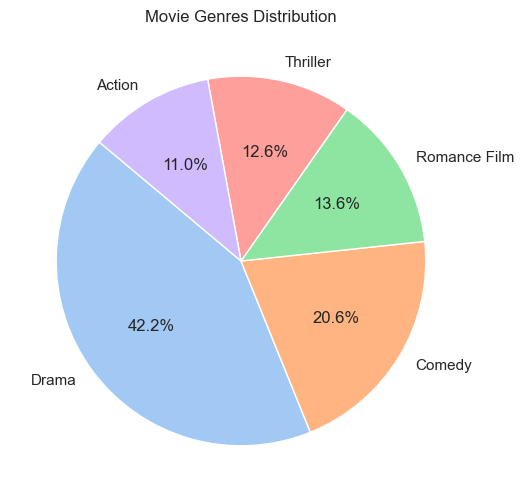

In [109]:
create_genre_pie_chart(df_release_info)

The 'drama' genre predominates significantly, while the other genres are fairly balanced among themselves.Now, we will examine the distribution of films across months based on their genres.

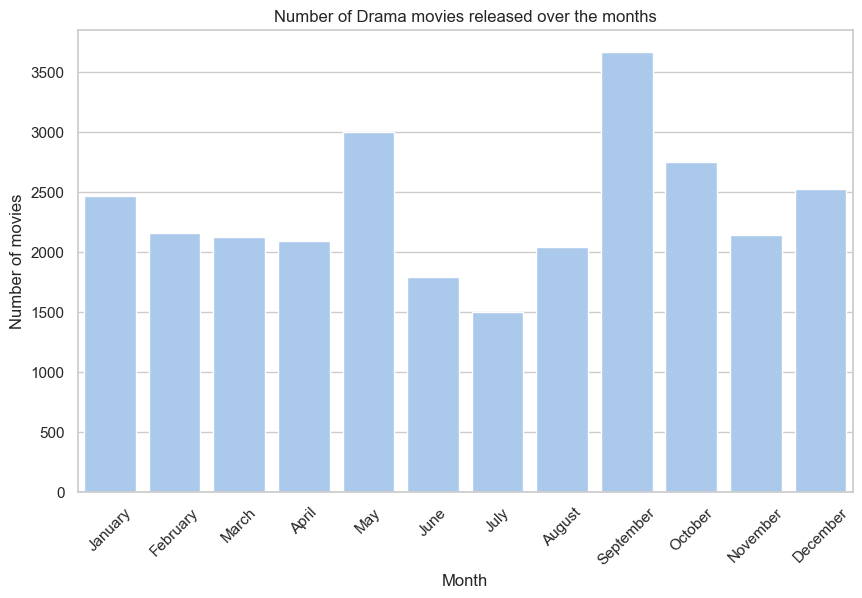

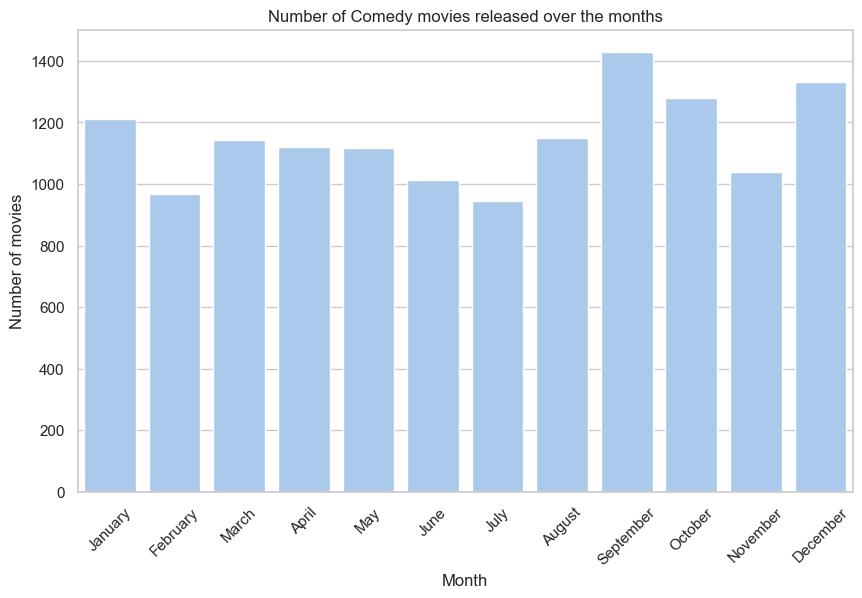

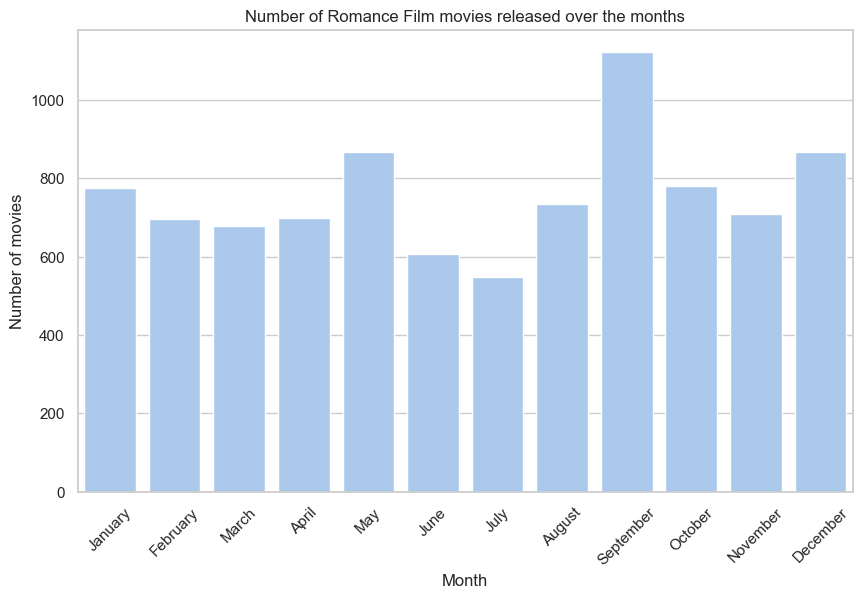

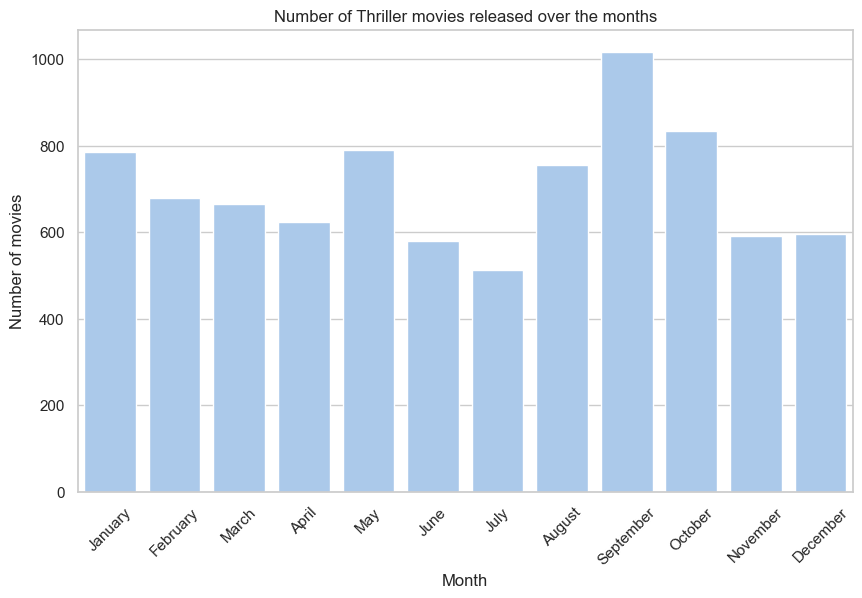

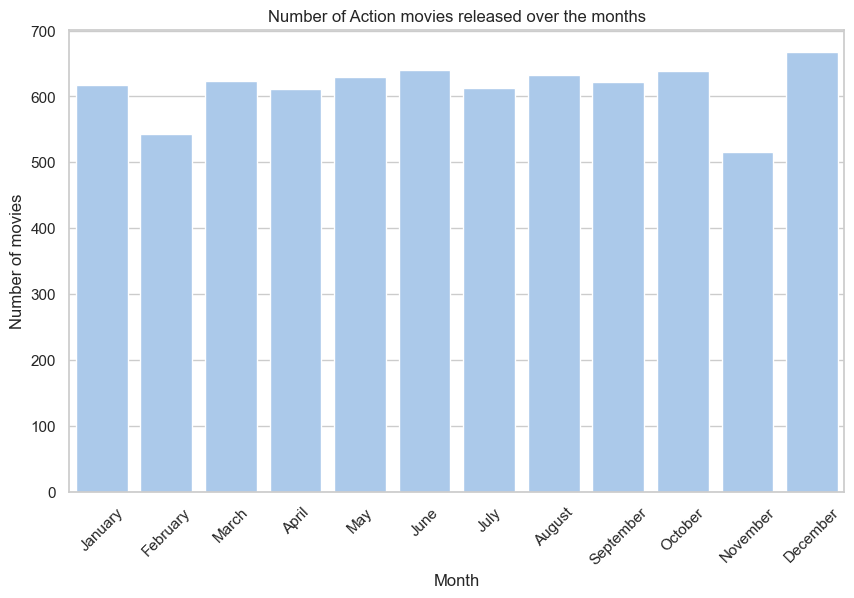

In [110]:
plot_monthly_movie_counts(df_release_info, selected_genres)

We observe significantly different distributions among genres. Action films appear to have a relatively uniform distribution throughout the year. It's worth noting that action is the only genre that doesn't experience a decline during the summer, which contradicts the general trend. It's important to mention that for the final analysis, correlation tests will be considered to confirm whether or not months can have an impact on certain genres

#### **1.5 Continent Repartition in our Dataset**

In [111]:
print("In our dataset, we have {} countries in which movies have been released".format(df_release_info['Movie countries'].nunique()))

In our dataset, we have 139 countries in which movies have been released


In our dataset, we have a wide range of countries represented. To study the link between location and the distribution of release months, we will group these countries by their continents.

In [112]:
df_release_info = assign_movie_continents(df_release_info)
df_release_info.head(1)

66832it [00:03, 16805.79it/s]


,Movie name,Movie countries,Movie genres,Release Year,Release Month,Release Day,Month Available,Release Decade,Movie Continent
0,Ghosts of Mars,United States of America,Thriller,2001,8,24,True,2000,North America


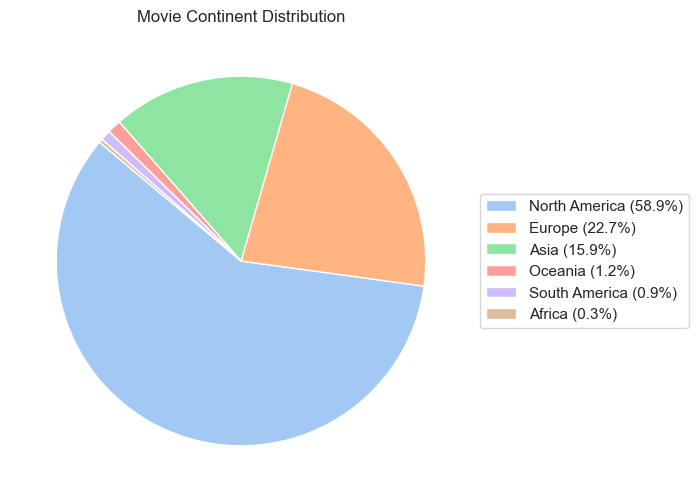

In [113]:
plot_movie_continent_distribution(df_release_info.drop_duplicates(subset=['Movie name'], inplace=False))

The pie chart shows us the proportion of each continent in our dataset. We observe that three continents represent almost the entirety of our dataset, so we will focus on these.

In [114]:
continents_to_keep  = ['Europe', 'Asia', 'North America']

In [115]:
continents_to_keep  = ['Europe', 'Asia', 'North America']
df_release_info = df_release_info[df_release_info['Movie Continent'].isin(continents_to_keep)]

**Conclusion**


Based on the observations and initial analyses, we can confidently state that there are certainly interesting aspects to explore regarding the relationship between the film's release month, its film genre, its location, and its evolution over time.

Several avenues have been discussed to enhance and group our dataset for a meaningful statistical analysis. For the final analysis, we plan to investigate the correlation between these factors, considering the influence that these parameters may have on each other.

### **2. Research Question 2:  Analysis on Pursuing Oscar's**

#### **2.1 Data preparation**

It is noticed that some records in the Award dataset are corresponding to the same movie name. This is because of spliting of genres in data preprocessing. We need therefore first remove the duplicates to make sure that each movie is uniquely represented in the dataset.

In [116]:
# Remove duplicate movies
df_month_avail_unique = df_month_avail.drop_duplicates(subset=['Movie name'], inplace=False)

#### **2.2 Release timing: When is the optimal release time?**

In order to investigate the effect of releasing timing on probability of winning Oscar, it is necessary to check the distribution of release month of movies in the dataset, which are at least selected in the scope of Oscar's prize evaluation. The results are plotted in the bar chart to make the comparison easier.

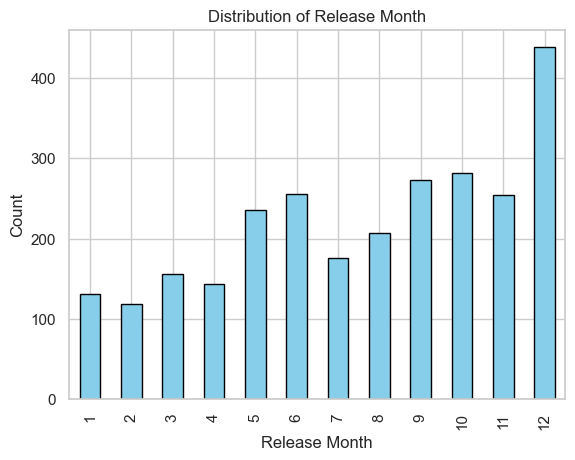

In [117]:
# Count the occurrences of each 'Release Month'
month_counts = df_month_avail_unique['Release Month'].value_counts()

# Sort the index to have months in chronological order
month_counts = month_counts.sort_index()

# Plotting the distribution
month_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.title('Distribution of Release Month')

# Display the plot
plt.show()

From the chart above, we can see that release timing of movies winning Oscar's prize is not equally distributed throughout the year. This could be explained as due to the preference of the Academy to movies released in certain periods in a year. For example, the appearance of excellent movies usually adhere to some seasonality patterns. 

However, some people may argue that there is another possibility of imbalanced number of movies released in each month. To verify that, we can run a logistic regression of whether a movie wins ('Winner') on release month. 

In [118]:
# Generate one-hot-encoding for 'Release Month'
one_hot = pd.get_dummies(df_month_avail_unique['Release Month'], prefix='Month')

# Concatenate the one-hot-encoded DataFrame with the original DataFrame
df_month_avail_one_hot = pd.concat([df_month_avail_unique, one_hot], axis=1)

# Define the target variable and the feature variables
y = df_month_avail_one_hot['Winner']
X = df_month_avail_one_hot.iloc[:, 16:]

# Convert all columns in X to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Output the regressed coefficient of each generated column
coef = logreg.coef_.reshape(-1, 1)
intercept = logreg.intercept_
# Concatenate intercept to the end of coef
coef = np.concatenate((np.array([intercept]), coef), axis=0)


# Convert coef to a DataFrame with Release Month as index
df_coef = pd.DataFrame(coef)
df_coef.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_coef.rename(columns={0: 'Regressor Coefficient'}, inplace=True)

# Output the DataFrame
display(df_coef)

,Regressor Coefficient
January,-1.330211
February,-0.145387
March,-0.266946
April,-0.211374
May,-0.054594
June,-0.399790
July,-0.404200
August,-0.157056
September,-0.184998
October,-0.293143


We can also check the correlation between winning the award and release timing. 'Release Month' is categorical, and 'Winner' is binary, so we can use Cramér's V to check the correlation, which is specifically designed to measure the association between two categorical variables (regard binary feature as a special categorical feature). It is based on the chi-squared statistic, 

In [119]:
from scipy.stats import chi2_contingency

# Assuming df_month_avail_one_hot is your DataFrame

# Create a contingency table
contingency_table = pd.crosstab(df_month_avail_unique['Release Month'], df_month_avail_unique['Winner'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Display the result
print("Cramér's V:", cramers_v)

Cramér's V: 0.052745022481659604


This indicates a very weak association between the 'Release Month' and 'Winner' variables, and directors cannot expect to try better luck to release their movies in a "good" month. However, release timing could still be considered as a factor  and control variable in the further study.

We also check the evolvement of release month of selected movies across years.

In [122]:
total_rows = len(df_month_avail_unique)
# Group by 'Release Month' and 'Release Year', calculate the mean of 'Winner'
percentage_true = df_month_avail_unique.groupby(['Release Month', 'Release Year'])['Winner'].sum() / total_rows * 100

# Unstack the DataFrame for easy plotting
percentage_true = percentage_true.unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(30, 10))
ax = percentage_true.plot(kind='bar', stacked=True, colormap='viridis',legend=False)

# Adding labels and title
plt.xlabel('Release Month')
plt.ylabel('Percentage of Awards')
plt.title('Probability of winning Oscar prize by Release Month')

# Create a separate Axes for the legend
legend_ax = plt.gca().inset_axes([1.05, 0, 0.05, 1], frameon=False)

# Custom legend every 10 years
years_to_show = range(percentage_true.columns.min(), percentage_true.columns.max() + 1, 10)
legend_labels = [f'{year}-{year+9}' for year in years_to_show]

# Plot colored rectangles on the legend Axes
for i, year in enumerate(years_to_show):
    legend_ax.add_patch(plt.Rectangle((0, i * 0.1), 0.5, 0.1, color=sns.color_palette('viridis', n_colors=len(years_to_show))[i]))

# Set legend labels
legend_ax.set_yticks([i * 0.1 + 0.05 for i in range(len(years_to_show))])
legend_ax.set_yticklabels(legend_labels, ha='left')
legend_ax.set_xticks([])
#legend_ax.set_title('Release Year', pad=-20)

# Display the plot
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

It is interesting to observe the facts including: 
 - in the very early years, very few movies released in summer days were selected to Oscar's competition
 - in recent years, movies released in November and December are favored

#### **2.3 Countries: Where are Oscar's award movies from?**

The next factor we consider as siginificant is the origin of movies. The first issue is to inspect is the evaluation of Oscar's prize really "fair" for movies from different countries? We have an initial check by looking at the composition of film countries.

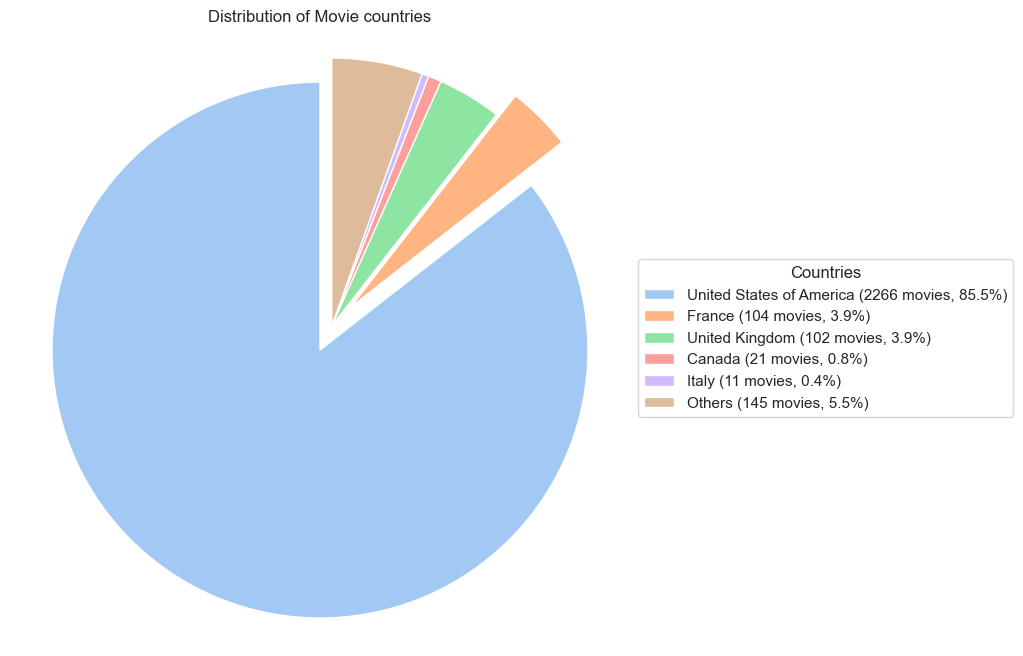

In [123]:
plot_award_distribution(df_month_avail_unique, 'countries')

It is obvious that movies from USA make up a significant majority. This could make the conclusion biased when we are evaluating a movie from a country other than USA. 

#### **2.4 Languages: Culcural identity of movies**

Another feature considered for further analysis is the movie language. We also hope to check its distribution in the dataset.

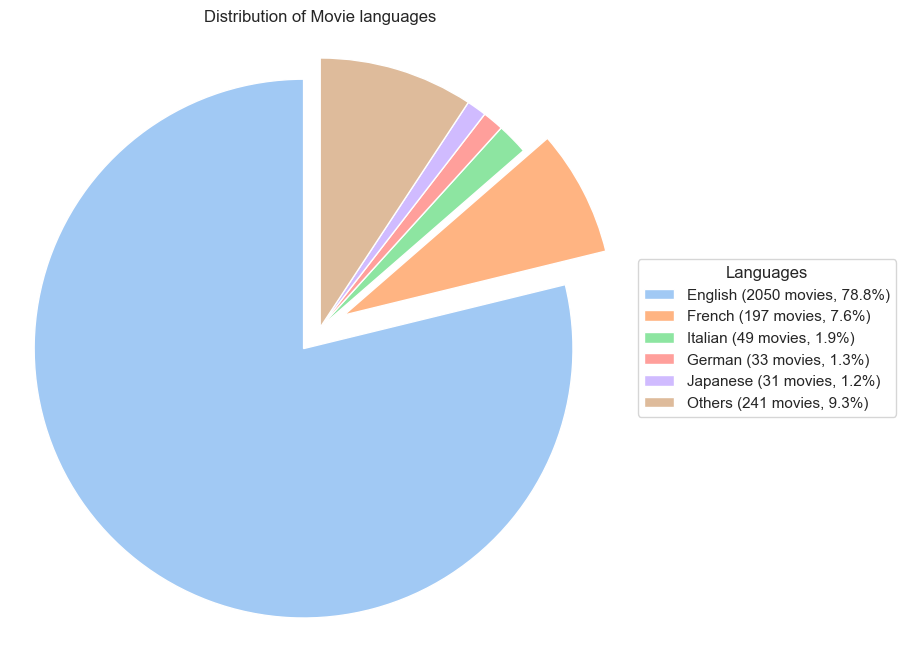

In [124]:
plot_award_distribution(df_month_avail_unique, 'languages')

Same as movie countries, English is dominant in the dataset. It is reasonable considering that USA and UK are the top 2 movie countries in the Award dataset. Similarly, we are very cautious when we have to generalize any conclusion to non-English movies because of their minority in this dataset.

### **3. Research Question 3**